In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
pd.set_option("display.max_columns",80)

In [46]:
df1=pd.read_csv("house prices/train.csv")

In [47]:
df1.drop("Id",inplace=True,axis=1)

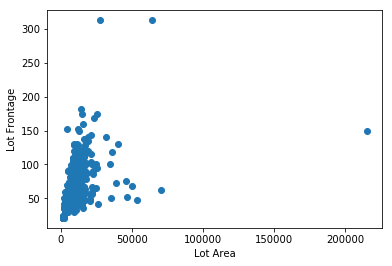

In [48]:
plt.scatter(df1["LotArea"],df1["LotFrontage"])
plt.xlabel("Lot Area")
plt.ylabel("Lot Frontage")
plt.show()

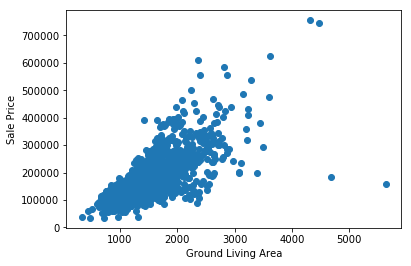

In [49]:
plt.scatter(y=df1["SalePrice"],x=df1["GrLivArea"])
plt.ylabel("Sale Price")
plt.xlabel("Ground Living Area")
plt.show()

In [50]:
df1.drop(df1[df1.GrLivArea>4000].index,inplace=True,axis=0)

In [51]:
df1.reset_index(inplace=True,drop=True)

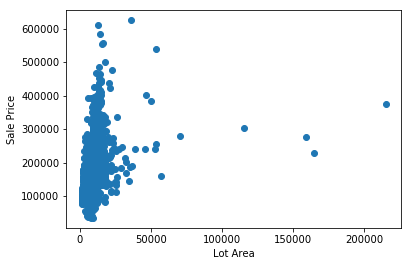

In [52]:
plt.scatter(df1["LotArea"],df1["SalePrice"])
plt.ylabel("Sale Price")
plt.xlabel("Lot Area")
plt.show()

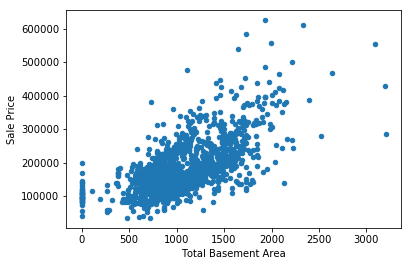

In [53]:
df1.plot.scatter(y="SalePrice",x="TotalBsmtSF")
plt.ylabel("Sale Price")
plt.xlabel("Total Basement Area")
plt.show()

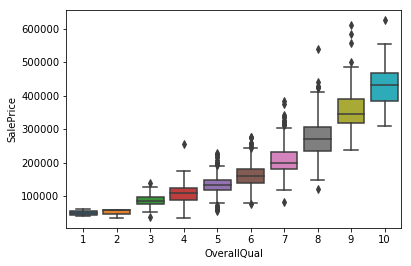

In [54]:
sns.boxplot(x="OverallQual",y="SalePrice",data=df1)
plt.show()

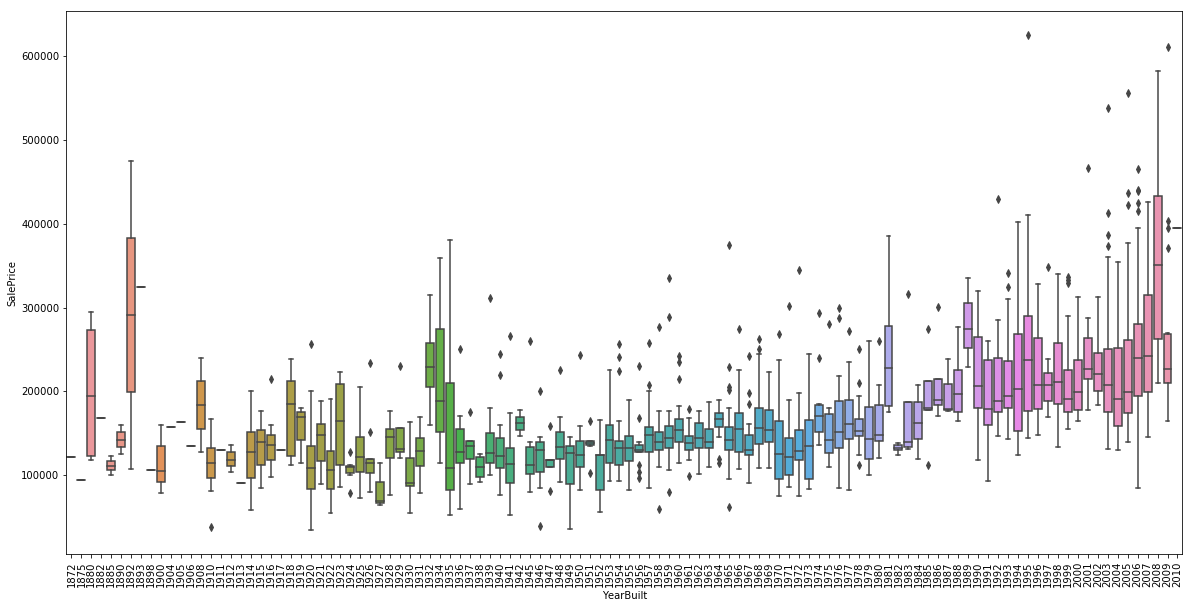

In [55]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(x="YearBuilt",y="SalePrice",data=df1)
plt.show()

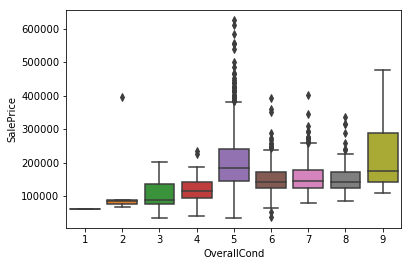

In [56]:
plt.xlim(-1,9)
sns.boxplot(x="OverallCond",y="SalePrice",data=df1)

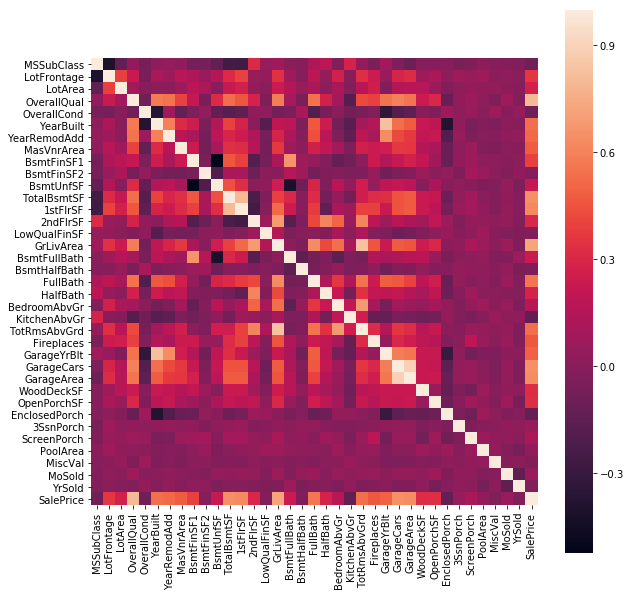

In [57]:
plt.figure(figsize=(10,10))
corr_mat=df1.corr()
sns.heatmap(corr_mat,square=True)
plt.show()

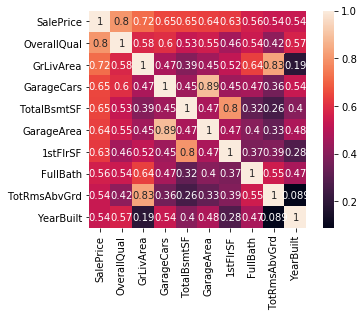

In [58]:
cols=corr_mat.nlargest(n=10,columns="SalePrice")["SalePrice"].index

cm=np.corrcoef(df1[cols].values.T)

sns.heatmap(cm,square=True,yticklabels=cols.values,xticklabels=cols.values,annot=True)
plt.show()

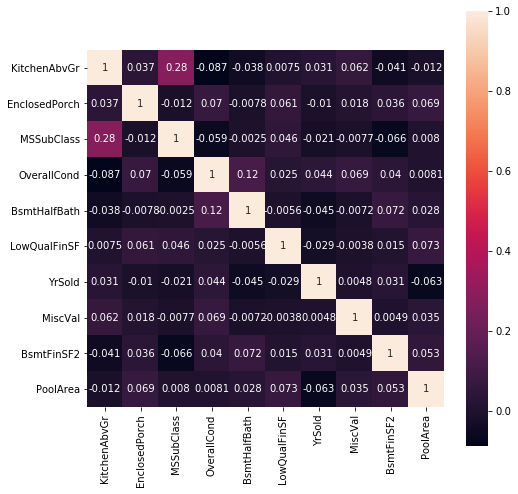

In [59]:
plt.figure(figsize=(8,8))
cols=corr_mat.nsmallest(n=10,columns="SalePrice")["SalePrice"].index

cm=np.corrcoef(df1[cols].values.T)

sns.heatmap(cm,square=True,yticklabels=cols.values,xticklabels=cols.values,annot=True)
plt.show()

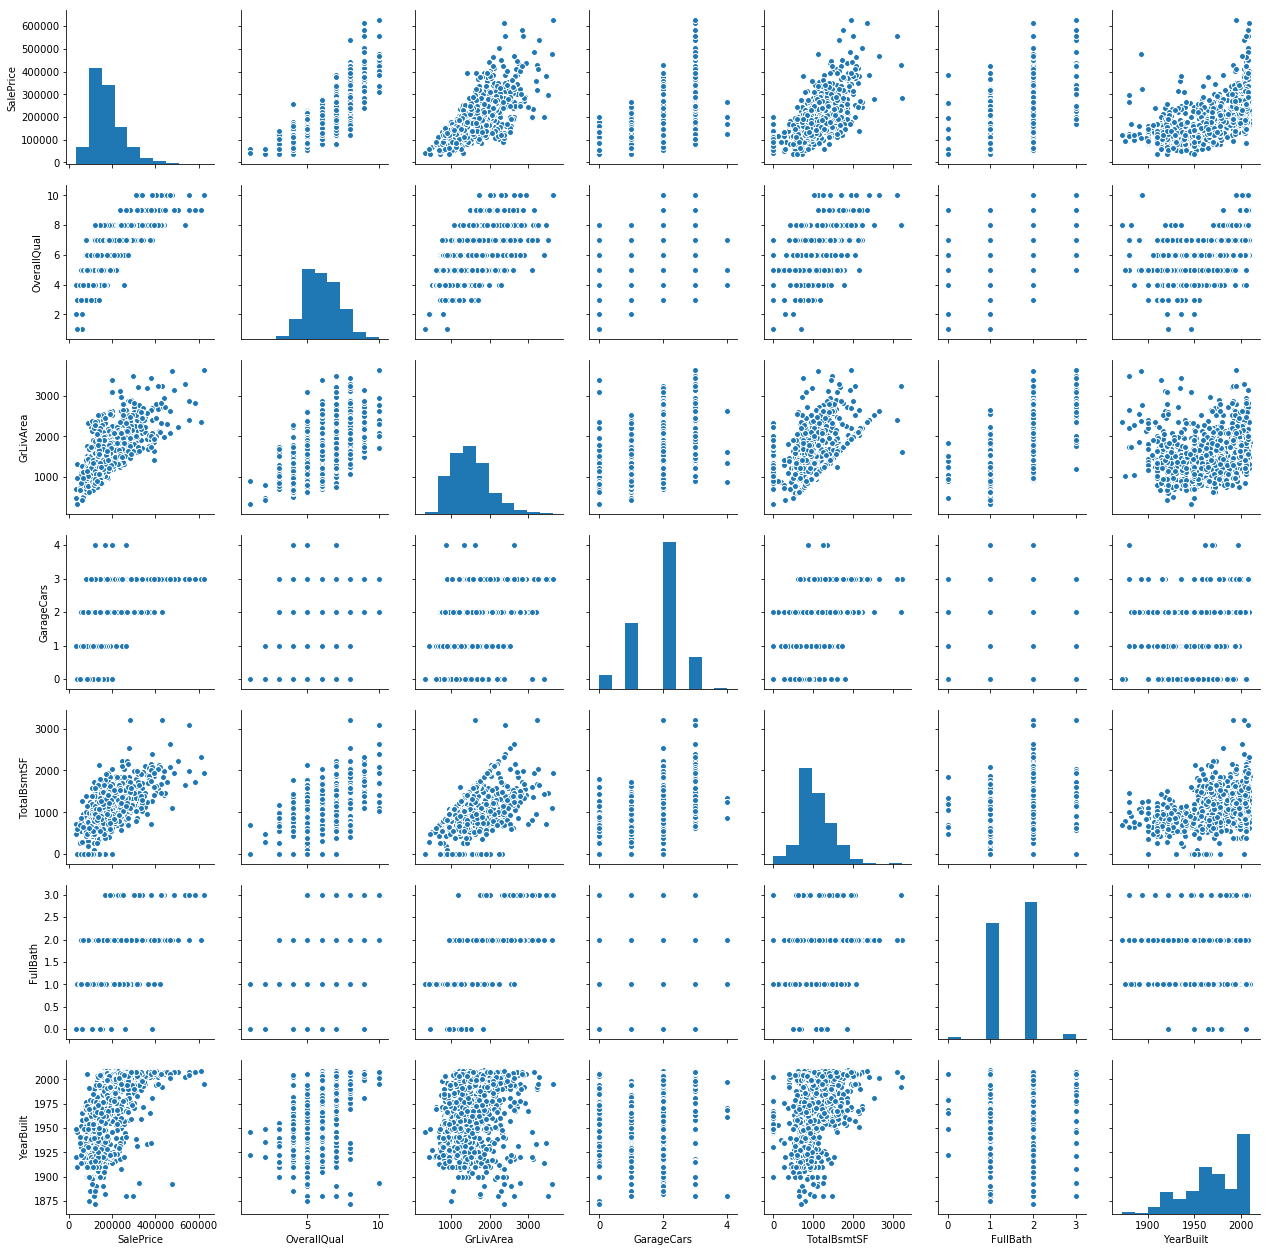

In [60]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df1[cols],size=2.5)
plt.show()

In [61]:
df=df1.iloc[:,:-1]

In [65]:
print("\nNumber of Null Values:\n")
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,df[i].isnull().sum())


Number of Null Values:

LotFrontage 259
Alley 1365
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1451
Fence 1176
MiscFeature 1402


In [66]:
df.LotFrontage.fillna(value=df.LotFrontage.median(),inplace=True)

df.Alley.fillna(value="None",inplace=True)    #No alley access

df.MasVnrType.fillna(value="None",inplace=True)     #No masonry

df.MasVnrArea.fillna(value=0,inplace=True)

df.BsmtQual.fillna(value="None",inplace=True)

df.BsmtCond.fillna(value="None",inplace=True)

df.BsmtExposure.fillna(value="None",inplace=True)

df.BsmtFinType1.fillna(value="None",inplace=True)

df.BsmtFinType2.fillna(value="None",inplace=True)

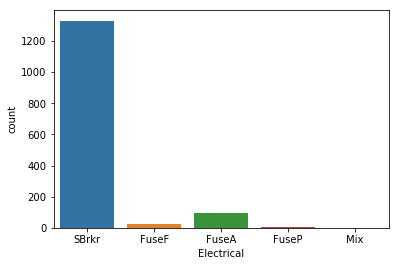

In [67]:
sns.countplot(data=df,x="Electrical")
plt.show()

In [68]:
df.Electrical.fillna(value="SBrkr",inplace=True)

df.FireplaceQu.fillna(value="None",inplace=True)

df.GarageArea.fillna(value=0,inplace=True)

df.GarageCars.fillna(value=0,inplace=True)

df.GarageCond.fillna(value="None",inplace=True)

df.GarageFinish.fillna(value="None",inplace=True)

df.GarageQual.fillna(value="None",inplace=True)

df.GarageType.fillna(value="None",inplace=True)

df.GarageYrBlt.fillna(value=0,inplace=True)

df.PoolQC.fillna(value="None",inplace=True)

df.Fence.fillna(value="None",inplace=True)

df.MiscFeature.fillna(value="None",inplace=True)

In [69]:
df["TotalSF"]=df["TotalBsmtSF"]+df["2ndFlrSF"]+df["1stFlrSF"]

In [70]:
df.LotArea=np.log1p(df.LotArea)
df.GrLivArea=np.log1p(df.GrLivArea)
df.LotFrontage=np.log1p(df.LotFrontage)

In [71]:
df.YearRemodAdd=2012-df.YearRemodAdd

In [72]:
df.YearBuilt=2012-df.YearBuilt

In [73]:
df.drop(["GarageArea","1stFlrSF","TotRmsAbvGrd","PoolArea","MiscVal","LowQualFinSF","MSSubClass","ExterCond","Fence","YrSold","MoSold","GarageYrBlt","KitchenAbvGr","Heating","BsmtHalfBath","GarageCond","BsmtFinSF2","BsmtCond","EnclosedPorch","Street","LandSlope","Alley"],inplace=True,axis=1)

In [74]:
df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolQC,MiscFeature,SaleType,SaleCondition,TotalSF
0,RL,4.189655,9.042040,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,9,9,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,854,7.444833,1,2,1,3,Gd,Typ,0,None,Attchd,RFn,2,TA,Y,0,61,0,0,None,None,WD,Normal,2566
1,RL,4.394449,9.169623,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,36,36,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,0,7.141245,0,2,0,3,TA,Typ,1,TA,Attchd,RFn,2,TA,Y,298,0,0,0,None,None,WD,Normal,2524
2,RL,4.234107,9.328212,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,866,7.488294,1,2,1,3,Gd,Typ,1,TA,Attchd,RFn,2,TA,Y,0,42,0,0,None,None,WD,Normal,2706
3,RL,4.110874,9.164401,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,97,42,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,756,7.448916,1,1,0,3,Gd,Typ,1,Gd,Detchd,Unf,3,TA,Y,0,35,0,0,None,None,WD,Abnorml,2473
4,RL,4.442651,9.565284,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1053,7.695758,1,2,1,4,Gd,Typ,1,TA,Attchd,RFn,3,TA,Y,192,84,0,0,None,None,WD,Normal,3343


In [75]:
cont_class=["LotFrontage","GrLivArea","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","2ndFlrSF","WoodDeckSF","OpenPorchSF","3SsnPorch","ScreenPorch","TotalSF"]

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cont_class]=scaler.fit_transform(df[cont_class])

In [77]:
ord_class=["ExterQual","BsmtQual","HeatingQC","KitchenQual","FireplaceQu","GarageQual","PoolQC","BsmtFinType2","BsmtFinType1"]

In [78]:
def ord_transform(df):
    if df=="Ex":
        df=1
    elif df=="Gd":
        df=2
    elif df=="TA":
        df=3
    elif df=="Fa":
        df=4
    elif df=="None":
        df=5
    elif df=="GLQ":
        df=6    
    elif df=="ALQ":
        df=7
    elif df=="BLQ":
        df=8
    elif df=="Rec":
        df=9
    elif df=="LwQ":
        df=10
    elif df=="Unf":
        df=11
    elif df=="Po":
        df=12
    return df   

In [79]:
for i in ord_class:    
    df[i]=df[i].apply(ord_transform)

In [80]:
cat_class=[]
for i in df.columns:
    if i not in cont_class:
        if i not in ord_class:
            cat_class.append(i)

In [81]:
test=pd.read_csv("house prices/test.csv")

submission=pd.DataFrame({"Id":test["Id"]})

test.drop("Id",inplace=True,axis=1)

test.LotFrontage.fillna(value=test.LotFrontage.median(),inplace=True)

test.Alley.fillna(value="None",inplace=True)    #No alley access

test.MasVnrType.fillna(value="None",inplace=True)     #No masonry

test.MasVnrArea.fillna(value=0,inplace=True)

test.BsmtQual.fillna(value="None",inplace=True)

test.BsmtCond.fillna(value="None",inplace=True)

test.BsmtExposure.fillna(value="None",inplace=True)

test.BsmtFinType1.fillna(value="None",inplace=True)

test.BsmtFinType2.fillna(value="None",inplace=True)

test.Electrical.fillna(value="SBrkr",inplace=True)

test.FireplaceQu.fillna(value="None",inplace=True)

test.GarageArea.fillna(value=0,inplace=True)

test.GarageCars.fillna(value=0,inplace=True)

test.GarageCond.fillna(value="None",inplace=True)

test.GarageFinish.fillna(value="None",inplace=True)

test.GarageQual.fillna(value="None",inplace=True)

test.GarageType.fillna(value="None",inplace=True)

test.GarageYrBlt.fillna(value=0,inplace=True)

test.PoolQC.fillna(value="None",inplace=True)

test.Fence.fillna(value="None",inplace=True)

test.MiscFeature.fillna(value="None",inplace=True)

test.BsmtFinSF1.fillna(value=0,inplace=True)
test.BsmtFinSF2.fillna(value=0,inplace=True)
test.BsmtUnfSF.fillna(value=0,inplace=True)

test.TotalBsmtSF.fillna(value=0,inplace=True)

test.Utilities.fillna(value="AllPub",inplace=True)

test.SaleType.fillna(value="WD",inplace=True)

test.MSZoning.fillna(value="RL",inplace=True)

test.Exterior1st.fillna(value="Other",inplace=True)
test.Exterior2nd.fillna(value="Other",inplace=True)

test.BsmtFullBath.fillna(value=0,inplace=True)
test.BsmtHalfBath.fillna(value=0,inplace=True)

test.KitchenQual.fillna(value="TA",inplace=True)

test.Functional.fillna(value="Typ",inplace=True)

test["TotalSF"]=test["TotalBsmtSF"]+test["2ndFlrSF"]+test["1stFlrSF"]

test.YearRemodAdd=2012-test.YearRemodAdd
test.YearBuilt=2012-test.YearBuilt

test.LotArea=np.log1p(test.LotArea)
test.GrLivArea=np.log1p(test.GrLivArea)
test.LotFrontage=np.log1p(test.LotFrontage)

test.drop(["GarageArea","1stFlrSF","TotRmsAbvGrd","PoolArea","MiscVal","LowQualFinSF","MSSubClass","ExterCond","Fence","YrSold","MoSold","GarageYrBlt","KitchenAbvGr","Heating","BsmtHalfBath","GarageCond","BsmtFinSF2","BsmtCond","EnclosedPorch","Street","LandSlope","Alley"],inplace=True,axis=1)

test[cont_class]=scaler.transform(test[cont_class])

for i in ord_class:    
    test[i]=test[i].apply(ord_transform)

#for i in cat_class:
#    test[i]=le.fit_transform(test[i])

In [82]:
all_data=pd.concat((df,test)).reset_index()

In [83]:
from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[cont_class].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
3SsnPorch,11.368094
ScreenPorch,3.943508
MasVnrArea,2.600697
OpenPorchSF,2.529245
WoodDeckSF,1.848285
BsmtFinSF1,0.974138
TotalSF,0.936173
BsmtUnfSF,0.920135
2ndFlrSF,0.843237
TotalBsmtSF,0.662657


skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le=LabelEncoder()

In [86]:
for i in cat_class:
    le.fit(all_data[i])
    df[i]=le.transform(df[i])
    test[i]=le.transform(test[i])

In [87]:
Y=df1.SalePrice

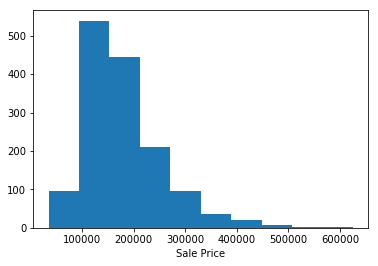

In [90]:
plt.hist(x=Y)
plt.xlabel("Sale Price")
plt.show()

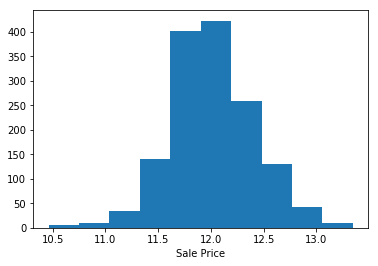

In [91]:
plt.hist(x=np.log(Y))
plt.xlabel("Sale Price")
plt.show()

In [92]:
Y=np.log(Y)

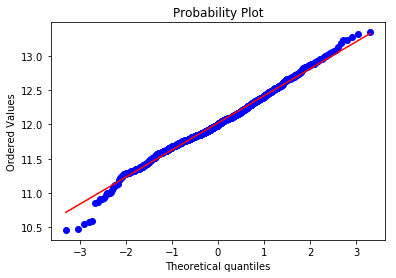

In [93]:
from scipy import stats
stats.probplot(Y,plot=plt)
plt.show()

In [94]:
def trans(df):
    if df!=0:
        df=np.log(df)
    return df    

In [95]:
df.GrLivArea=df.GrLivArea.apply(trans)
df.TotalBsmtSF=df.TotalBsmtSF.apply(trans)

In [48]:
from sklearn.cross_validation import train_test_split

C:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
X_train,X_test,y_train,y_test=train_test_split(df,Y,random_state=0)

Gradient Boosting with Parameter Tuning

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
gbm=GradientBoostingRegressor(n_estimators=100,random_state=0,learning_rate=0.1, min_samples_split=10,min_samples_leaf=2,max_depth=8,max_features='sqrt',subsample=0.8)

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=0.8, verbose=0,
             warm_start=False)

In [114]:
y_pred=gbm.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.11599643965911413

In [58]:
from sklearn.grid_search import GridSearchCV

In [68]:
params={"n_estimators":(90,95,100,105,110,115)}

gsearch=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(random_state=0,learning_rate=0.1, min_samples_split=10,min_samples_leaf=2,max_depth=8,max_features='sqrt',subsample=0.8),scoring="neg_mean_squared_error",param_grid=params,n_jobs=-1)

gsearch.fit(df,Y)

print(gsearch.best_params_)

np.sqrt(-gsearch.best_score_)

{'n_estimators': 100}


0.12805844528023055

In [70]:
params={"max_depth":(4,5,6,7,16,20),"min_samples_split":(12,14,16,18,20,22,24),"min_samples_leaf":(2,3,4,5,6)}

gsearch1=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(n_estimators=100,random_state=0,learning_rate=0.1,max_features='sqrt',subsample=0.8),scoring="neg_mean_squared_error",param_grid=params,n_jobs=-1)

gsearch1.fit(df,Y)

print(gsearch1.best_params_)

np.sqrt(-gsearch1.best_score_)

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 12}


0.12020592256015147

In [78]:
params={"max_features":(2,3,4,5,6,7,8,9,10)}

gsearch2=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(n_estimator,random_state=0,learning_rate=0.1, min_samples_split=12,min_samples_leaf=5,max_depth=5,subsample=0.8),scoring="neg_mean_squared_error",param_grid=params,n_jobs=-1)

gsearch2.fit(df,Y)

print(gsearch2.best_params_)

np.sqrt(-gsearch2.best_score_)

{'max_features': 7}


0.12020592256015147

In [85]:
params={"subsample":(.75,.77,0.8,0.82)}

gsearch3=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(,n_estimator=100,random_state=0,learning_rate=0.1, min_samples_split=12,min_samples_leaf=5,max_depth=5,max_features=7),scoring="neg_mean_squared_error",param_grid=params,n_jobs=-1)

gsearch3.fit(df,Y)

print(gsearch3.best_params_)

np.sqrt(-gsearch3.best_score_)

{'subsample': 0.8}


0.12020592256015147

In [124]:
gbm_final=GradientBoostingRegressor(n_estimators=100,random_state=0,learning_rate=0.1, min_samples_split=12,min_samples_leaf=5,max_depth=5,max_features=7,subsample=0.8)
np.sqrt(-cross_val_score(estimator=gbm_final,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.11985996974424784

In [95]:
gbm1=GradientBoostingRegressor(n_estimators=200,random_state=0,learning_rate=0.05, min_samples_split=12,min_samples_leaf=5,max_depth=5,max_features=7,subsample=0.8)
np.sqrt(-cross_val_score(estimator=gbm1,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.12072985157503079

In [91]:
gbm2=GradientBoostingRegressor(n_estimators=400,random_state=0,learning_rate=0.01, min_samples_split=12,min_samples_leaf=5,max_depth=5,max_features=7,subsample=0.8)
np.sqrt(-cross_val_score(estimator=gbm2,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.12442353372107269

In [92]:
gbm3=GradientBoostingRegressor(n_estimators=800,random_state=0,learning_rate=0.005, min_samples_split=12,min_samples_leaf=5,max_depth=5,max_features=7,subsample=0.8)
np.sqrt(-cross_val_score(estimator=gbm3,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.12473607319861051

In [93]:
gbm4=GradientBoostingRegressor(n_estimators=1600,random_state=0,learning_rate=0.001, min_samples_split=12,min_samples_leaf=5,max_depth=5,max_features=7,subsample=0.8)
np.sqrt(-cross_val_score(estimator=gbm4,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.16788020552120109

In [125]:
gbm_final.fit(X_train,y_train)
y_pred=gbm_final.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.11435316618602688

In [183]:
from sklearn.ensemble import RandomForestRegressor

In [184]:
rm=RandomForestRegressor(random_state=0)

In [185]:
rm.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [186]:
y_pred=rm.predict(X_test)

In [187]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.13294839930041977

XGBoost

In [131]:
from xgboost.sklearn import XGBRegressor

In [132]:
xgb=XGBRegressor(seed=27)

In [133]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

In [134]:
y_pred=xgb.predict(X_test)

In [135]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.11470453647814818

In [138]:
param_test1 = {"n_estimators":(150,175,200,225,250,275,300)
}
xgsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, max_depth=5,min_child_weight=1,gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
xgsearch2.fit(df,Y)
print(xgsearch2.best_params_)
np.sqrt(-xgsearch2.best_score_)

{'n_estimators': 150}


0.12433287698716451

In [140]:
param_test2 = {
 'max_depth':(2,3,4,5,6,7,12),
 'min_child_weight':(3,4,5,6,7,8)
}
xgsearch2 = GridSearchCV(estimator = XGBRegressor( n_estimators=150,learning_rate =0.1,gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
xgsearch2.fit(df,Y)
print(xgsearch2.best_params_)
np.sqrt(-xgsearch2.best_score_)

{'max_depth': 4, 'min_child_weight': 4}


0.12051002554761529

In [156]:
param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
xgsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, n_estimators=150, max_depth=4,
min_child_weight=4, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
xgsearch3.fit(df,Y)
print(xgsearch3.best_params_)
np.sqrt(-xgsearch3.best_score_)

{'gamma': 0.0}


0.12051002554761529

In [160]:
param_test4 = {
 'subsample':(.75,.8,.85,.90),
 'colsample_bytree':(.5,.55,.6,.65,.7)
}
xgsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=150, max_depth=4,gamma=0,
min_child_weight=4, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
xgsearch4.fit(df,Y)
print(xgsearch4.best_params_)
np.sqrt(-xgsearch4.best_score_)

{'colsample_bytree': 0.7, 'subsample': 0.75}


0.11965683868485121

In [161]:
param_test5 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
xgsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=150, max_depth=4,gamma=0,colsample_bytree=.7,subsample=.75,
min_child_weight=4, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
xgsearch5.fit(df,Y)
print(xgsearch5.best_params_)
np.sqrt(-xgsearch5.best_score_)

{'reg_alpha': 0.01}


0.11927632944321016

In [180]:
param_test6 = {"n_estimators":(250,275,375,350,300,400,425,450)}
xgsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, max_depth=4,gamma=0,colsample_bytree=.7,subsample=.75,
reg_alpha=.01,min_child_weight=4, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
xgsearch6.fit(df,Y)
print(xgsearch6.best_params_)
np.sqrt(-xgsearch6.best_score_)

{'n_estimators': 250}


0.11844902587629742

In [167]:
xgb1=XGBRegressor(n_estimators=500, learning_rate =0.05,gamma=0, max_depth=4,min_child_weight=4,nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.75,reg_alpha=.01)
np.sqrt(-cross_val_score(estimator=xgb1,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.11994376837131095

In [168]:
xgb1=XGBRegressor(n_estimators=1000, learning_rate =0.01,gamma=0, max_depth=4,min_child_weight=4,nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.75,reg_alpha=.01)
np.sqrt(-cross_val_score(estimator=xgb1,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.11977880270699147

In [169]:
xgb1=XGBRegressor(n_estimators=2000, learning_rate =0.005,gamma=0, max_depth=4,min_child_weight=4,nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.75,reg_alpha=.01)
np.sqrt(-cross_val_score(estimator=xgb1,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.11981193998535007

In [178]:
xgb1=XGBRegressor(n_estimators=4000, learning_rate =0.001,gamma=0, max_depth=4,min_child_weight=4,nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.75,reg_alpha=.01)
np.sqrt(-cross_val_score(estimator=xgb1,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.26338308401031513

In [172]:
xgb_final=XGBRegressor( learning_rate =0.1, max_depth=4,gamma=0,colsample_bytree=.7,subsample=.75,n_estimators=250,
reg_alpha=.01,min_child_weight=4, nthread=4, scale_pos_weight=1,seed=27)
xgb_final.fit(X_train,y_train)
y_pred=xgb_final.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.1115790130063276

In [188]:
from sklearn.linear_model import Ridge

In [189]:
ridge=Ridge(alpha=.09,random_state=0)

In [190]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [191]:
y_pred=ridge.predict(X_test)

In [192]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.11100116654049516

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
lin=LinearRegression()

In [195]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [196]:
y_pred=lin.predict(X_test)

In [197]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.1110593079869454

In [198]:
from sklearn.linear_model import Lasso

In [199]:
lasso=Lasso(alpha=.0002)

In [200]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [201]:
y_pred=lasso.predict(X_test)

In [202]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.11039094399945922

In [203]:
from sklearn.linear_model import ElasticNet

In [204]:
elastic=ElasticNet(alpha=.0002)

In [205]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0002, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [206]:
y_pred=elastic.predict(X_test)

In [207]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.11067624390145128

In [208]:
np.sqrt(-cross_val_score(estimator=gbm,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.1277592775682217

In [209]:
np.sqrt(-cross_val_score(estimator=xgb_final,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.11803443831956213

In [210]:
np.sqrt(-cross_val_score(estimator=lin,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.12003487351297655

In [211]:
np.sqrt(-cross_val_score(estimator=ridge,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.11995570593731769

In [212]:
np.sqrt(-cross_val_score(estimator=lasso,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.11961150045528995

In [213]:
np.sqrt(-cross_val_score(estimator=elastic,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

0.11978255528764359

In [255]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold

In [272]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [311]:
stacked_averaged_models = StackingAveragedModels(base_models = (elastic, xgb_final, ridge),meta_model = lasso)

In [312]:
np.sqrt(-cross_val_score(estimator=stacked_averaged_models,cv=3,X=df,y=Y,scoring="neg_mean_squared_error")).mean()

C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.1146084506457425

In [313]:
stacked_averaged_models.fit(X_train,y_train)

StackingAveragedModels(base_models=(ElasticNet(alpha=0.0002, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False), XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=...e, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)),
            meta_model=Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
            n_folds=5)

In [362]:
y_pred=.7*stacked_averaged_models.predict(X_test)+0.15*xgb_final.predict(X_test)+0.15*lasso.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.10443434039123937

In [117]:
test.GrLivArea=test.GrLivArea.apply(trans)
test.TotalBsmtSF=test.TotalBsmtSF.apply(trans)

In [352]:
predictions=0.7*stacked_averaged_models.predict(test)+0.15*xgb_final.predict(test)+0.15*lasso.predict(test)

In [349]:
predictions=np.exp(predictions)

In [350]:
submission["SalePrice"]=predictions

In [351]:
submission.to_csv("house prices/submission.csv",index=None)